In [37]:
%%bash

uv pip install --no-config matplotlib

Audited 1 package in 5ms


#### 📖 Exercice

 * Compléter la classe `Memory` suivante. Il est interdit d'utiliser l'attribut (liste) `.data` (sinon c'est de la triche 😛). Les accesseur `__getitem__` et `__setitem__` permettent de lire et écrire les items de la mémoire en utilisant la syntaxe `memory[i]` pour lire l'attribute `.data` à l'indice `i`. Pareillement vous pouvez écrire dans la mémoire à un indice `i` en utilisant `memory[i] = some_value`. Voir https://docs.python.org/3/library/collections.abc.html#collections-abstract-base-classes pour les méthodes spéciales telles que `__getitem__`.

    ###

   ```python
    from typing import Generic, TypeVar
    
    T = TypeVar('T')  # we declare a generic for our stack
    
    
    class Memory(Generic[T]):
        """Simulate some memory management in Python.
        
        Attributes:
           data: the data of the memory.
        """
       
        def __init__(self) -> None:
           """Create a Memory instance.

           Note:
               The data contained is an empty list.
           """
           self.data = []

        def __str__(self) -> str:
            """Represent the nemory as a string."""
            return str(self.data)
    
        def __getitem__(self, index: int) -> T:
            """Get an item of the memory.

            Example:
                ```python
                memory = Memory()
                memory.allocate(4)
                print(memory[3])  # should print `None`
                ```
            """
            return self.data[index]
    
        def __setitem__(self, index: int, value: T) -> None:
            """Set an item of the memory.

            Example:
                ```python
                memory = Memory()
                memory.allocate(4)
                memory[3] = 1
                print(memory[3])  # should print `1`
                ```
            """
            self.data[index] = value
    
        def allocate(self, size: int) -> None:
           """Allocate some memory.
    
           After calling this method, the data in the memory is
           a list with length `size` filled with `None`.
           """
           # Your code here
   ```

    ###

   Les méthode spéciales `__getitem__` et `__setitem__` permetent de lire et modifier les éléments de
   votre mémoire avec la syntaxe `memory[i]` et `memory[i] = some_value`. Tester que le code suivant fonctionne:

    ###

   ```python
   memory = Memory()
   memory.allocate(4)
   print(memory.data)  # devrait afficher [None, None, None, None]
   ```

In [29]:
from typing import Generic, TypeVar, Self

T = TypeVar('T')  # we declare a generic for our stack


class Memory(Generic[T]):
    """Simulate some memory management in Python.
    
    Attributes:
       data: the data of the memory.
    """
   
    def __init__(self) -> None:
       """Create a Memory instance.

       Note:
           The data contained is an empty list.
       """
       self.data = []
       self.size = 0

    def __str__(self) -> str:
        """Represent the nemory as a string."""
        return str(self.data)

    def __getitem__(self, index: int) -> T:
        """Get an item of the memory.

        Example:
            ```python
            memory = Memory()
            memory.allocate(4)
            print(memory[3])  # should print `None`
            ```
        """
        return self.data[int(index)]  # anti-cheat :)

    def __setitem__(self, index: int, value: T) -> None:
        """Set an item of the memory.

        Example:
            ```python
            memory = Memory()
            memory.allocate(4)
            memory[3] = 1
            print(memory[3])  # should print `1`
            ```
        """
        self.data[int(index)] = value  # anti-cheat :)

    def allocate(self, size: int) -> None:
       """Allocate some memory.

       After calling this method, the data in the memory is
       a list with length `size` filled with `None`.
       """
       self.data = [None] * size
       self.size = size

    def copy(self, memory: Self) -> None:
       """Copy a list of into the memory.

       If the source memory contains more elements than there
       is allocated in the current memory, the elements are not
       copied.
       """
       for i in range(memory.size):
           self[i] = memory[i]

In [30]:
memory = Memory()
memory.allocate(4)
print(memory.data)  # devrait afficher [None, None, None, None]

[None, None, None, None]


In [31]:
for i in range(4):
    memory[i] = i

print(memory)

[0, 1, 2, 3]


In [32]:
memory_2 = Memory()
print(memory_2)
memory_2.allocate(4)
memory_2.copy(memory)
print(memory_2.data)  # devrait afficher [None, None, None, None]

[]
[0, 1, 2, 3]


#### 📖 Exercice


 * Implémenter une pile d'entiers (stack) nomée `MemoryStack` en utilisant un tableau.
   On utilise la même interface que l'implémentation de la pile basée sur une liste chainée.
   On gère la mémoire avec la classe `Memory`de l'exercice précédent.

 * utiliser la méthode `monotonic` du module `time` pour calculer les temps d'insertion de 1000, 2500, 5000, 7500, 10000, 12500 et 15000 éléments dans la pile. Quel est la complexité du temps d'insertion? Comparer avec la pile basée sur les listes chainées. Si besoin répéter l'experience plusieurs fois pour plus de précision (par examples 100 fois).

   
    
```python
from typing import Generic, TypeVar


T = TypeVar('T')  # we declare a generic for our stack


class MemoryStack:
    """A stack.

    Attributes:
        memory: La mémoire
        memory_allocated = 0
        stack_size = 0    """

    def __init__(self) -> None:
        """Create an empty instance of stack."""
        self.memory = Memory()
        self.memory_allocated = 0
        self.stack_size = 0

    def __str__(self) -> str:
        """A string reprensentation stack."""
        result = "["
        for i in range(self.stack_size - 1):
            result += str(self.memory[i]) + ", "
            
        if self.stack_size > 0:
            result += str(self.memory[self.stack_size - 1])

        return result + "]"
    
    # We start by writing the simple methods: accessors and tests
    def empty(self) -> bool:
        """Test if the stack is empty.

        Returns:
            True if the stack is empty, otherwise False.
        """
        return self.stack_size == 0

    def peek(self) -> int | None:
        """Peek the first element of the stack

        Returns:
            The first element of the stack. If the stack is empty, return None.
        """
        return self.memory[self.stack_size - 1]

    def push(self, data: T) -> None:
        """Push an element onto the stack.

        Note:
            The size of the stack is increased by 1.

        Args:
            data: the value to push onto the stack.
        """
        if self.empty():
            self.memory_allocated = 1
            self.memory.allocate(self.memory_allocated)
        
        if self.stack_size >= self.memory_allocated:
            self.memory_allocated *= 2
            new_memory = Memory()
            new_memory.allocate(self.memory_allocated)
            for i in range(self.stack_size):
                new_memory[i] = self.memory[i]

            self.memory = new_memory

        self.memory[self.stack_size] = data
        self.stack_size += 1

    def pop(self) -> T | None:
        """Pop an element from the stack.

        Note:
            The size of the stack is decreased by 1.

        Returns:
            The element popped. If the stack is empty, return None.
        """
        # We use the walrus operator `:=` to assign and test in a single
        # expression
        self.stack_size -= 1
        return self.memory[self.stack_size]
```

In [33]:
from typing import Generic, TypeVar


T = TypeVar('T')  # we declare a generic for our stack


class MemoryStack:
    """A stack.

    Attributes:
        head: the head (first) node of the stack.
    """

    def __init__(self) -> None:
        """Create an empty instance of stack."""
        self.memory = Memory()
        self.stack_size = 0

    def __str__(self) -> str:
        """A string reprensentation stack."""
        result = "["
        for i in range(self.stack_size - 1):
            result += str(self.memory[i]) + ", "
            
        if self.stack_size > 0:
            result += str(self.memory[self.stack_size - 1])

        return result + "]"
    
    # We start by writing the simple methods: accessors and tests
    def empty(self) -> bool:
        """Test if the stack is empty.

        Returns:
            True if the stack is empty, otherwise False.
        """
        return self.stack_size == 0

    def peek(self) -> int | None:
        """Peek the first element of the stack

        Returns:
            The first element of the stack. If the stack is empty, return None.
        """
        return self.memory[self.stack_size - 1]

    def push(self, data: T) -> None:
        """Push an element onto the stack.

        Note:
            The size of the stack is increased by 1.

        Args:
            data: the value to push onto the stack.
        """
        if self.empty():
            self.memory.allocate(1)
        
        if self.stack_size >= self.memory.size:
            new_memory = Memory()
            new_memory.allocate(self.memory.size * 2)
            for i in range(self.stack_size):
                new_memory[i] = self.memory[i]

            self.memory = new_memory

        self.memory[self.stack_size] = data
        self.stack_size += 1

    def pop(self) -> T | None:
        """Pop an element from the stack.

        Note:
            The size of the stack is decreased by 1.

        Returns:
            The element popped. If the stack is empty, return None.
        """
        if self.stack_size == 0:
            return None

        self.stack_size -= 1
        return self.memory[self.stack_size]


print("Créons une pile vide.")
l = MemoryStack()
print("La pile est elle vide?", l.empty())

print("\n\nAjoutons trois éléments.")
for i in range(1, 4):
    l.push(i)

print("La pile contient?", l)

print("\n\nJetons un oeil à la tête de la pile.")
print("L'élément de tête est:", l.peek())

print("\n\nDépilons quatres éléments.")
for _i in range(4):
    print(l.pop())

print("La pile est elle vide? ", l.empty())

Créons une pile vide.
La pile est elle vide? True


Ajoutons trois éléments.
La pile contient? [1, 2, 3]


Jetons un oeil à la tête de la pile.
L'élément de tête est: 3


Dépilons quatres éléments.
3
2
1
None
La pile est elle vide?  True


In [35]:
from typing import Generic, TypeVar, Self

T = TypeVar('T')  # we declare a generic for our stack


# In general, class names start with a capital letter
# Start with an _ to signal an implementation detail
class _StackNode(Generic[T]):
    """A stack node.

    Attributes:
        data: The data contained in the node.
        next: The next stack node.
    """

    def __init__(self, data: T) -> None:
        """Create a stack node instance.

        Args:
            data: the data contained in the stack node.
        """
        self.data: T = data
        self.next: Self | None = None

    def __str__(self) -> str:
        """A string reprensentation of the stack node."""
        return f"[{self.data}, {self.next}]"


class Stack:
    """A stack.

    Attributes:
        head: the head (first) node of the stack.
    """

    def __init__(self) -> None:
        """Create an empty instance of stack."""
        self.head: _StackNode[T] | None = None

    def __str__(self) -> str:
        """A string reprensentation stack."""
        return str(self.head)
    
    # We start by writing the simple methods: accessors and tests
    def empty(self) -> bool:
        """Test if the stack is empty.

        Returns:
            True if the stack is empty, otherwise False.
        """
        return self.head is None

    def peek(self) -> int | None:
        """Peek the first element of the stack

        Returns:
            The first element of the stack. If the stack is empty, return None.
        """
        return None if self.empty() else self.head.data

    def push(self, data: T) -> None:
        """Push an element onto the stack.

        Note:
            The size of the stack is increased by 1.

        Args:
            data: the value to push onto the stack.
        """
        new_node = _StackNode(data)
        new_node.next = self.head
        self.head = new_node

    def pop(self) -> T | None:
        """Pop an element from the stack.

        Note:
            The size of the stack is decreased by 1.

        Returns:
            The element popped. If the stack is empty, return None.
        """
        data = self.peek()
        if data is not None:
            # Here the head is not None because self.peek did not return None.
            # If the head is not None, the stack is not empty. Hence we must
            # remove the head and replace it with the next element.
            self.head = self.head.next

        return data


print("Créons une pile vide.")
l = Stack()
print("La pile est elle vide?", l.empty())

print("\n\nAjoutons trois éléments.")
for i in range(1, 4):
    l.push(i)

print("La pile contient?", l)

print("\n\nJetons un oeil à la tête de la pile.")
print("L'élément de tête est:", l.peek())

print("\n\nDépilons quatres éléments.")
for _i in range(4):
    print(l.pop())

print("La pile est elle vide? ", l.empty())

Créons une pile vide.
La pile est elle vide? True


Ajoutons trois éléments.
La pile contient? [3, [2, [1, None]]]


Jetons un oeil à la tête de la pile.
L'élément de tête est: 3


Dépilons quatres éléments.
3
2
1
None
La pile est elle vide?  True


calcul des temps d'insertion pour MemoryStack
[0.0006162181001127465, 0.0015479020696511725, 0.0021683403303177327, 0.002716186790712527, 0.004313484869635431, 0.004840763439424336, 0.005532548660121392]


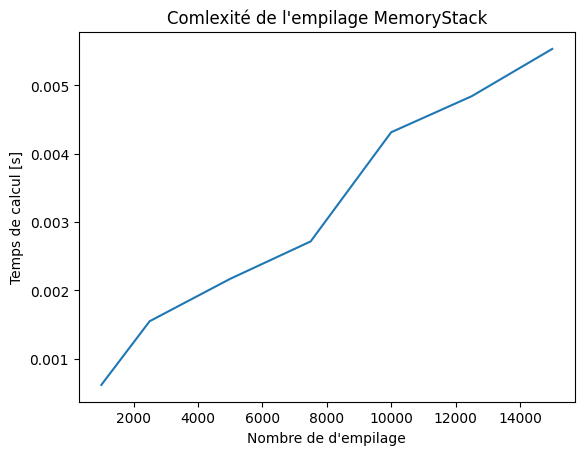

La complexité est linéaire
calcul des temps d'insertion pour Stack
[0.0001376567094848724, 0.002057662929582875, 0.003023873649799498, 0.004925108419847675, 0.005973612690067967, 0.00964119087009749, 0.01073877031034499]


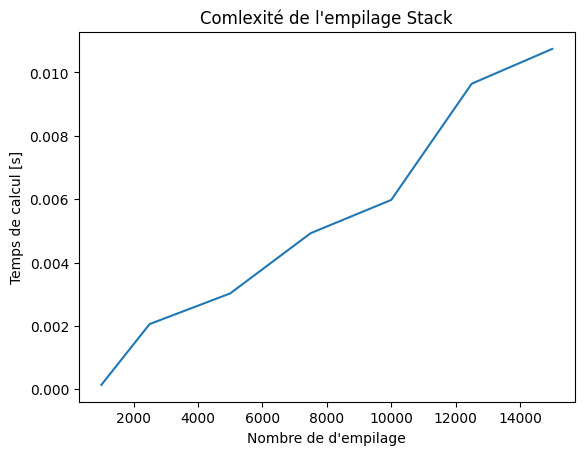

La complexité est linéaire


In [36]:
from time import monotonic
import matplotlib.pyplot as plt


print("calcul des temps d'insertion pour MemoryStack")

REPEAT = 100

number_of_pushes = [1000, 2500, 5000, 7500, 10000, 12500, 15000]
insertion_time = [0] * len(number_of_pushes)

for index, n in enumerate(number_of_pushes):
    for _k in range(REPEAT):
        memory_stack = MemoryStack()
        insertion_time[index] -= monotonic()
    
        # On insère j éléments
        for j in range(n):
            memory_stack.push(j)
            
        insertion_time[index] += monotonic()

    insertion_time[index] /= REPEAT

print(insertion_time)

plt.plot(number_of_pushes, insertion_time)
plt.xlabel("Nombre de d'empilage")
plt.ylabel("Temps de calcul [s]")
plt.title("Comlexité de l'empilage MemoryStack")
plt.show()

print("La complexité est linéaire")

from time import monotonic
import matplotlib.pyplot as plt


print("calcul des temps d'insertion pour Stack")

REPEAT = 100

number_of_pushes = [1000, 2500, 5000, 7500, 10000, 12500, 15000]
insertion_time = [0] * len(number_of_pushes)

for index, n in enumerate(number_of_pushes):
    for _k in range(REPEAT):
        memory_stack = Stack()
        insertion_time[index] -= monotonic()
    
        # On insère j éléments
        for j in range(n):
            memory_stack.push(j)
            
        insertion_time[index] += monotonic()

    insertion_time[index] /= REPEAT

print(insertion_time)

plt.plot(number_of_pushes, insertion_time)
plt.xlabel("Nombre de d'empilage")
plt.ylabel("Temps de calcul [s]")
plt.title("Comlexité de l'empilage Stack")
plt.show()

print("La complexité est linéaire")